# T検定

TtestResult(statistic=-5.217491947499509, pvalue=0.0005510378621158206, df=9)

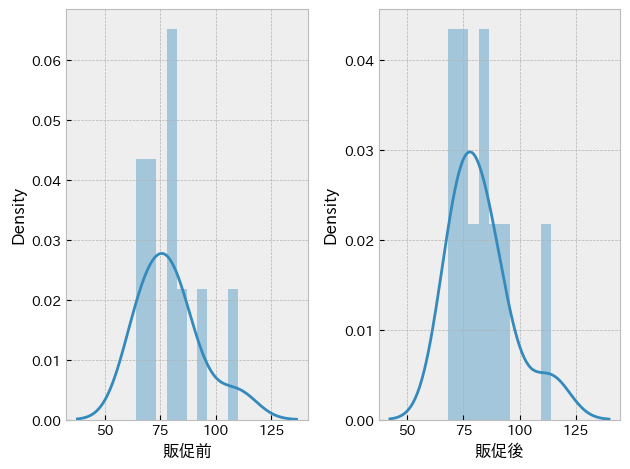

In [17]:
"""
T検定 パターン１
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh') # matplotlib のスタイルの設定

df = pd.read_csv('../data/simple_data/sample_01.csv')

# 平均値を確認
df.mean()

# NOTE:上記の平均がサンプル集団の平均の差なのか、それとも母集団の平均の差なのかを検定する。

# 正規分布に従うかの確認

# まずデータを可視化して、特徴をつかむ

display_two_histograms(df['販促前'], df['販促後'], bins=10)

# 正規分布かを確認する検定
static, pvalue = stats.shapiro(df['販促前'])
pvalue # 正規分布（0.05を超えているので帰無仮説を棄却できない。）

static, pvalue = stats.shapiro(df['販促後'])
pvalue # 正規分布（0.05を超えているので帰無仮説を棄却できない。）

# NOTE:上記で正規分布とわかり、そしてデータの構造的に対応があるとわかる
# 　　上記より、t検定を行うとわかる

# NOTE: rel: related。つまり対応がある。
stats.ttest_rel(df['販促前'], df['販促後'])


MannwhitneyuResult(statistic=58.0, pvalue=0.570605503511469)

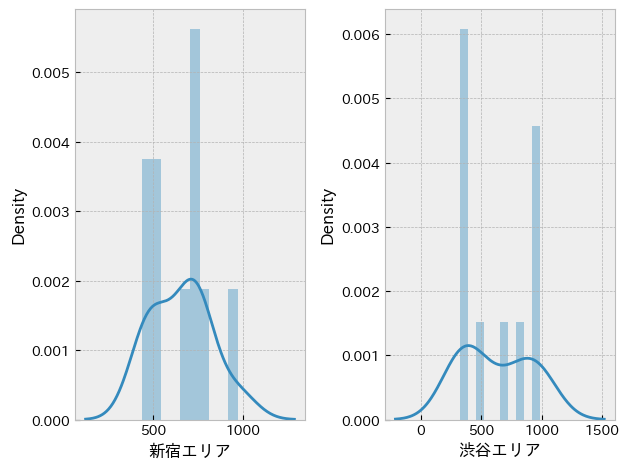

In [32]:
"""
T検定 パターン２
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from scipy import stats
import warnings

from helpers import display_two_histograms

warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh') # matplotlib のスタイルの設定

df = pd.read_csv('../data/simple_data/sample_02.csv')

# 平均値を確認
df.mean()

# とりあえず可視化して、特徴をつかむ
display_two_histograms(df['新宿エリア'], df['渋谷エリア'], bins=10)

# 正規性の検定
stats.shapiro(df['新宿エリア']) # 正規性を仮定

stats.shapiro(df['渋谷エリア']) # 正規性なし

# NOTE:上記の検定より、正規性がなく、対応がない(新宿と渋谷で異なるデータ)とわかる
#       上記より、mannwhitneyu検定を使う

# NOTE: alternative: two-sided, less, greater　３つで両側検定と片側検定を指定する。
# 　※ttestの時は、デフォルトで両側検定が指定される。
stats.mannwhitneyu(df['新宿エリア'], df['渋谷エリア'], alternative='two-sided')



Ttest_indResult(statistic=-2.370168982305104, pvalue=0.029155056786197644)

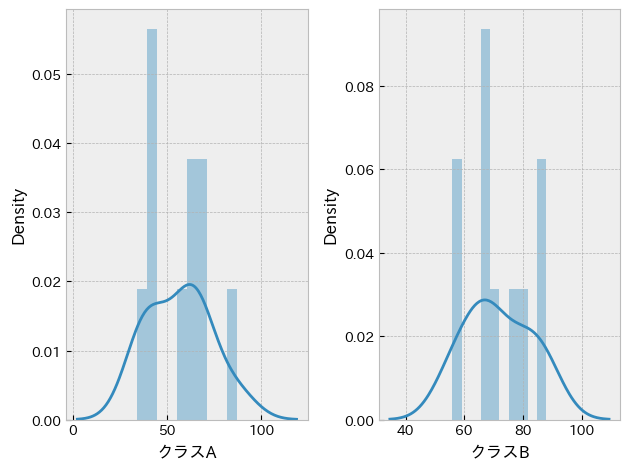

In [33]:
"""
T検定 パターン３
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from scipy import stats
import warnings

from helpers import display_two_histograms

warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh') # matplotlib のスタイルの設定

df = pd.read_csv('../data/simple_data/sample_03.csv')

# 平均値を確認
df.mean()

# とりあえず可視化して、特徴をつかむ
display_two_histograms(df['クラスA'], df['クラスB'], bins=10)

# 正規性の検定
stats.shapiro(df['クラスA']) # 正規性を仮定
stats.shapiro(df['クラスB']) # 正規性を仮定

# NOTE:上記より、正規分布で、対応のないデータとわかる
#       上記より、分散にを確認する必要があることがわかる

# 分散を検定する
stats.bartlett(df['クラスA'], df['クラスB']) # 分散が等しいと仮定

# NOTE：上記より、正規分布で、対応のない、等分散だと仮定できる。
#       上記より、対応のないT検定を行う

# NOTE: ind: independent。つまり対応がない。
# NOTE: equal_var: 分散が等しいかどうかを指定する。
stats.ttest_ind(df['クラスA'], df['クラスB'], equal_var=True)
